# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [1]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

/Users/dyawitz/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Some helper functions
The following functions will generate data and polynomial values.

In [2]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [3]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data for the formula below
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

('Coefficients: \n', array([-0.82021026]))
Variance score: 0.25
Residual sum of squares: 0.50
Bias: 0.363572855852
Variance: 0.126691128382


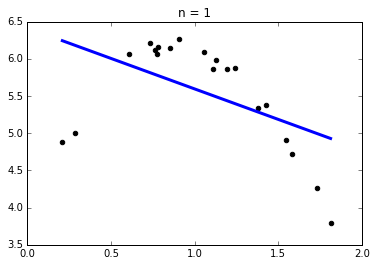

('Coefficients: \n', array([-0.52777568]))
Variance score: 0.47
Residual sum of squares: 0.50
Bias: 0.253060419718
Variance: 0.237203564516


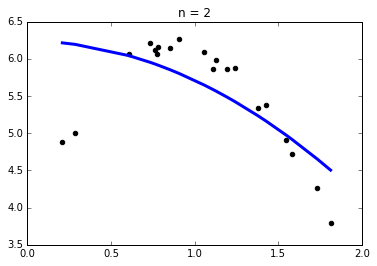

('Coefficients: \n', array([-0.32476236]))
Variance score: 0.62
Residual sum of squares: 0.50
Bias: 0.182310937305
Variance: 0.307953046929


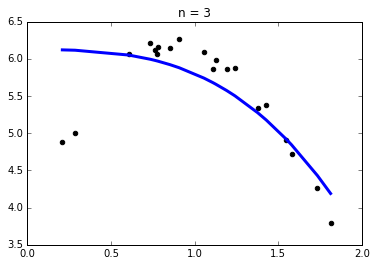

('Coefficients: \n', array([-0.19219438]))
Variance score: 0.69
Residual sum of squares: 0.50
Bias: 0.144634145577
Variance: 0.345629838657


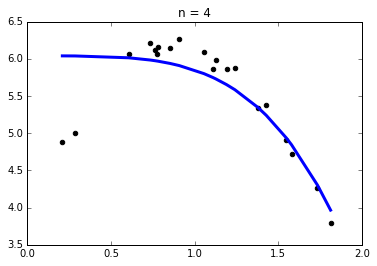

('Coefficients: \n', array([-0.11100883]))
Variance score: 0.72
Residual sum of squares: 0.50
Bias: 0.127772061005
Variance: 0.362491923229


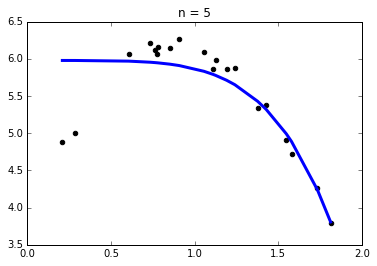

('Coefficients: \n', array([-0.06309195]))
Variance score: 0.73
Residual sum of squares: 0.50
Bias: 0.123250889588
Variance: 0.367013094646


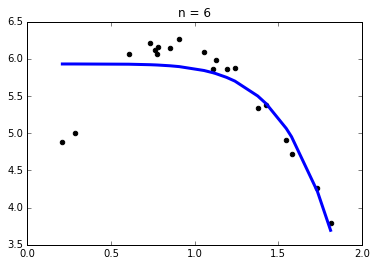

('Coefficients: \n', array([-0.03546548]))
Variance score: 0.73
Residual sum of squares: 0.50
Bias: 0.125812082646
Variance: 0.364451901588


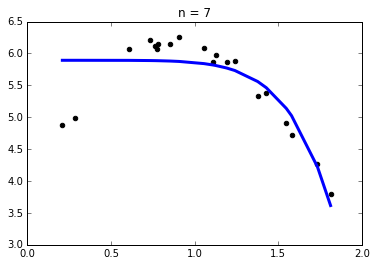

('Coefficients: \n', array([-0.0197851]))
Variance score: 0.72
Residual sum of squares: 0.50
Bias: 0.13226689268
Variance: 0.357997091554


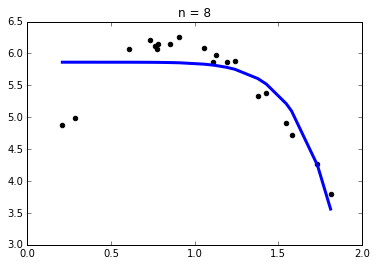

('Coefficients: \n', array([-0.01097976]))
Variance score: 0.70
Residual sum of squares: 0.50
Bias: 0.140700896526
Variance: 0.349563087708


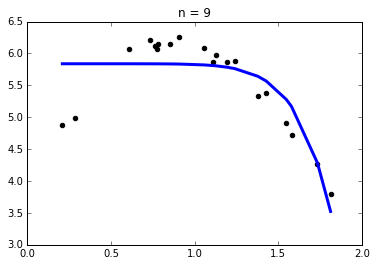

In [5]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])



for i in range(1, 10):
    X = monomials(domain, i) 
    # Create linear regression object and fit it to X and Y
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

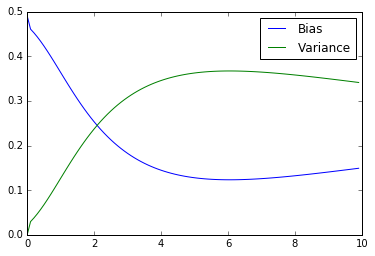

In [6]:
bs = [] #list of biases
vars_ = [] #list of variances
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    bs.append(bias)
    vars_.append(var)

#Plot the variance and bias
plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars_, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

('Coefficients: \n', array([-0.82021026]))
Variance score: 0.25
Residual sum of squares: 0.50
Bias: 0.363572855852
Variance: 0.126691128382


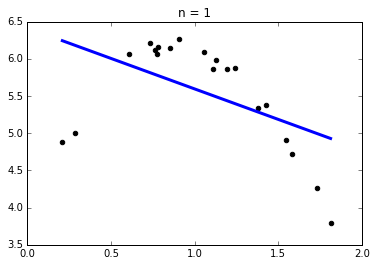

('Coefficients: \n', array([ 5.00404398, -2.81630098]))
Variance score: 0.99
Residual sum of squares: 0.50
Bias: -0.00256118137677
Variance: 0.492825165611


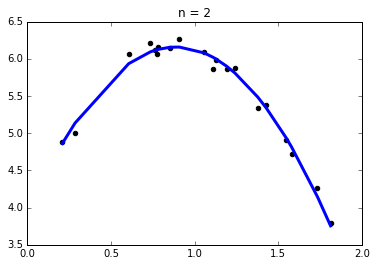

('Coefficients: \n', array([ 6.13558664, -4.14377885,  0.44314958]))
Variance score: 0.99
Residual sum of squares: 0.50
Bias: -0.00419022658429
Variance: 0.494454210818


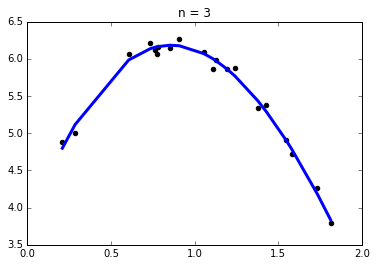

('Coefficients: \n', array([  6.12322101e+00,  -4.12044731e+00,   4.26340384e-01,
         4.09436690e-03]))
Variance score: 0.99
Residual sum of squares: 0.50
Bias: -0.00419024262648
Variance: 0.49445422686


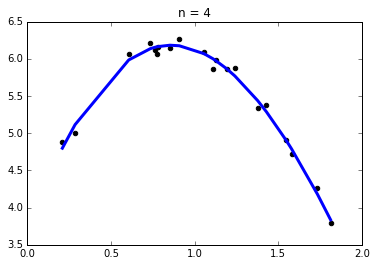

('Coefficients: \n', array([  1.16684382,   8.50974302, -13.75042024,   7.2699644 ,  -1.3887012 ]))
Variance score: 0.99
Residual sum of squares: 0.50
Bias: -0.00447992537966
Variance: 0.494743909614


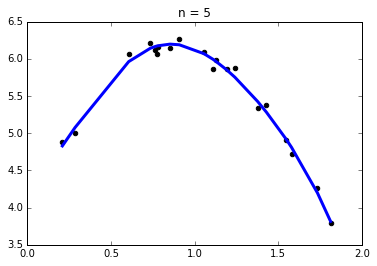

('Coefficients: \n', array([ -7.08801189,  37.09980585, -60.95456712,  47.33120778,
       -18.22970184,   2.77386215]))
Variance score: 0.99
Residual sum of squares: 0.50
Bias: -0.00469968772652
Variance: 0.494963671961


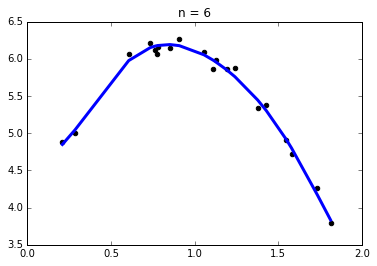

('Coefficients: \n', array([ -47.25328708,  213.39964086, -444.92756615,  504.60262798,
       -321.15282448,  107.50758567,  -14.72660906]))
Variance score: 0.99
Residual sum of squares: 0.50
Bias: -0.00579806801712
Variance: 0.496062052251


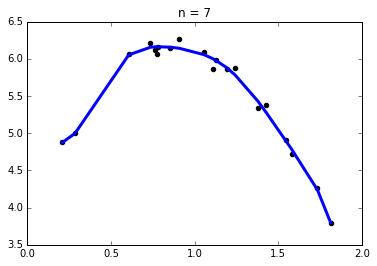

('Coefficients: \n', array([ -37.98843711,  164.85297952, -313.94224839,  302.22094835,
       -135.09945122,    6.97098592,   14.73446142,   -3.61047699]))
Variance score: 0.99
Residual sum of squares: 0.50
Bias: -0.00580568267735
Variance: 0.496069666911


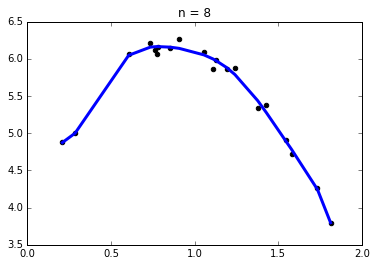

('Coefficients: \n', array([  -346.82296309,   1971.69434319,  -5935.96737297,  10697.8995022 ,
       -12128.8159605 ,   8726.85517721,  -3868.18114308,    963.43011157,
         -103.15800872]))
Variance score: 0.99
Residual sum of squares: 0.50
Bias: -0.00626664582989
Variance: 0.496530630064


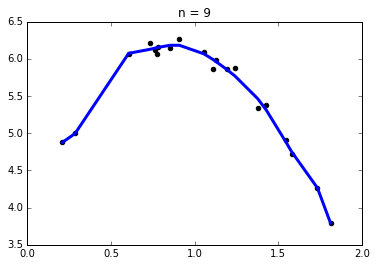

In [7]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

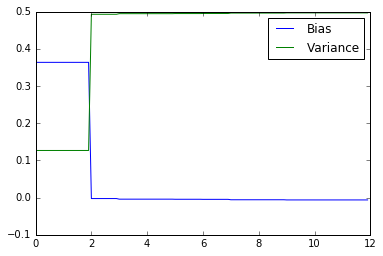

In [8]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity

('Coefficients: \n', array([ 0.97060234]))
Variance score: 0.97
Residual sum of squares: 0.21
Bias: -0.00370962396583
Variance: 0.199493018528


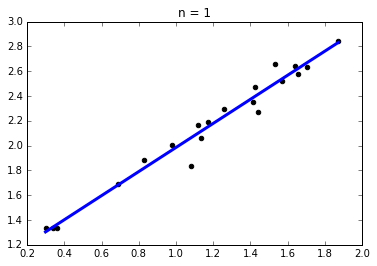

('Coefficients: \n', array([ 4.0257075]))
Variance score: 0.89
Residual sum of squares: 6.12
Bias: 0.657819941038
Variance: 5.4501322529


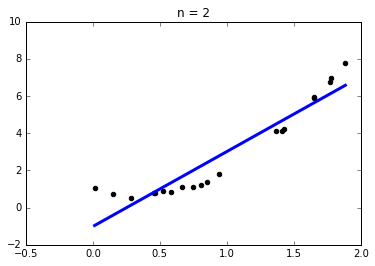

('Coefficients: \n', array([ 10.22219748]))
Variance score: 0.84
Residual sum of squares: 32.54
Bias: 5.15575867652
Variance: 27.3773430101


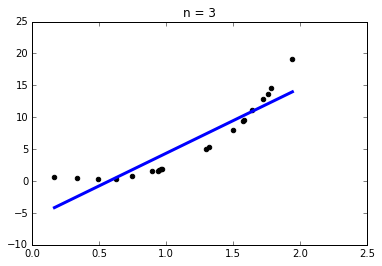

('Coefficients: \n', array([ 14.59868345]))
Variance score: 0.65
Residual sum of squares: 99.65
Bias: 34.8761443639
Variance: 64.7680570678


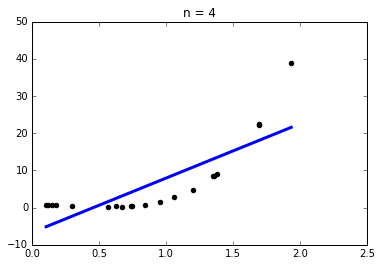

('Coefficients: \n', array([ 29.11706105]))
Variance score: 0.62
Residual sum of squares: 465.09
Bias: 175.900276413
Variance: 289.176486585


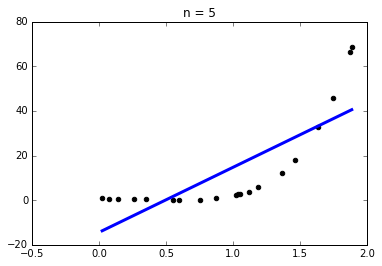

('Coefficients: \n', array([ 107.71059396]))
Variance score: 0.74
Residual sum of squares: 2108.39
Bias: 555.584286665
Variance: 1552.79949947


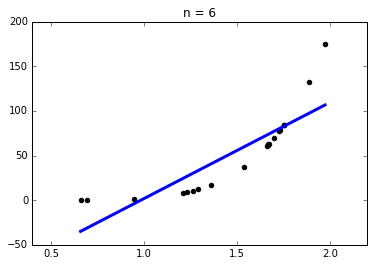

In [9]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

# Advanced Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

('Coefficients: \n', array([-0.25318194]))
Variance score: 0.51
Residual sum of squares: 0.45
Bias: 0.211555564638
Variance: 0.22776888977


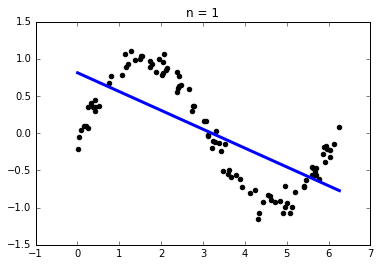

('Coefficients: \n', array([-0.14222715, -0.01757319]))
Variance score: 0.51
Residual sum of squares: 0.45
Bias: 0.208533504913
Variance: 0.230790949496


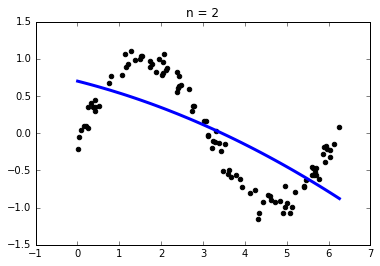

('Coefficients: \n', array([ 1.9723962 , -0.90341092,  0.09606572]))
Variance score: 0.97
Residual sum of squares: 0.45
Bias: 0.00293791165237
Variance: 0.436386542756


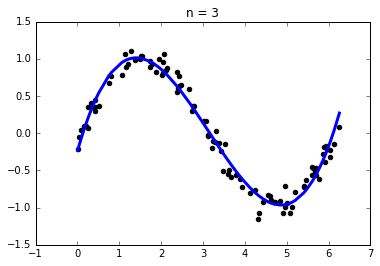

('Coefficients: \n', array([  2.08306941e+00,  -9.86039640e-01,   1.16885282e-01,
        -1.67475730e-03]))
Variance score: 0.97
Residual sum of squares: 0.45
Bias: 0.00279199245758
Variance: 0.436532461951


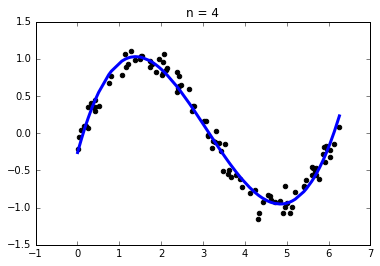

('Coefficients: \n', array([ 1.14484835,  0.07890622, -0.33679467,  0.07963475, -0.00518064]))
Variance score: 0.98
Residual sum of squares: 0.45
Bias: -0.000658059824653
Variance: 0.439982514233


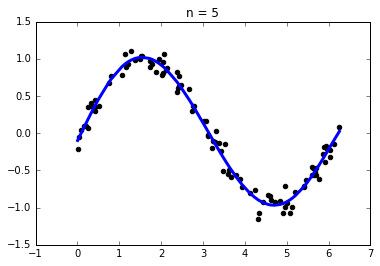

('Coefficients: \n', array([  1.31504445e+00,  -1.97954052e-01,  -1.58682233e-01,
         2.60938505e-02,   2.36140865e-03,  -4.02105611e-04]))
Variance score: 0.98
Residual sum of squares: 0.45
Bias: -0.000718058310033
Variance: 0.440042512719


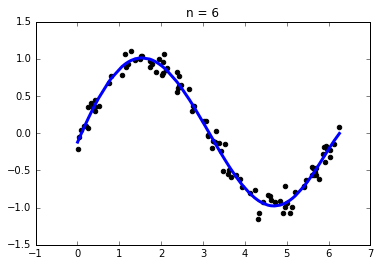

('Coefficients: \n', array([  1.57225908e+00,  -7.86294614e-01,   3.77336246e-01,
        -2.12081306e-01,   5.73653961e-02,  -6.74732173e-03,
         2.88932416e-04]))
Variance score: 0.98
Residual sum of squares: 0.45
Bias: -0.00079734618523
Variance: 0.440121800594


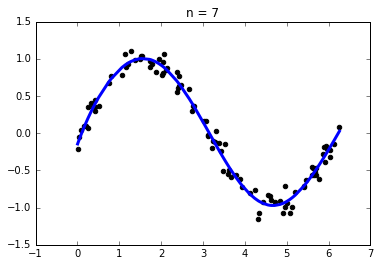

('Coefficients: \n', array([  1.48161619e+00,  -5.01266429e-01,   2.36485224e-02,
         6.75040702e-03,  -1.68027364e-02,   7.25148622e-03,
        -1.09129818e-03,   5.53952800e-05]))
Variance score: 0.98
Residual sum of squares: 0.45
Bias: -0.000804242980502
Variance: 0.440128697389


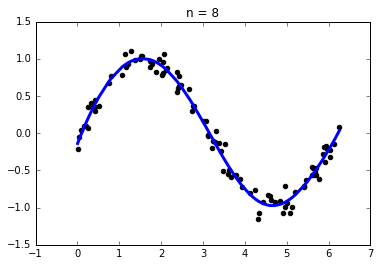

('Coefficients: \n', array([  1.57354920e+00,  -8.70007937e-01,   6.03196042e-01,
        -4.54685298e-01,   1.91374757e-01,  -4.82821291e-02,
         7.58538097e-03,  -6.78393480e-04,   2.59305514e-05]))
Variance score: 0.98
Residual sum of squares: 0.45
Bias: -0.000807779946777
Variance: 0.440132234355


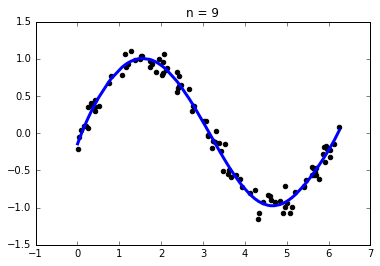

In [10]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()